In [17]:
!pip3 install mesa --user

You are using pip version 19.0.3, however version 20.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
!pip3 install -r https://raw.githubusercontent.com/projectmesa/mesa/master/examples/boltzmann_wealth_model/requirements.txt --user


You are using pip version 19.0.3, however version 20.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from mesa.space import MultiGrid

from mesa import Agent, Model
from mesa.time import RandomActivation

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
        print(new_position)
    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1

    def step(self):
        print('step')
        self.move()
        if self.wealth > 0:
            self.give_money()
class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        print("money")
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)

            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
    def step(self):
        self.schedule.step()

In [3]:
model = MoneyModel(30,50,50)
model.step()

money
step
(40, 18)
step
(40, 36)
step
(26, 18)
step
(49, 10)
step
(45, 11)
step
(7, 17)
step
(17, 1)
step
(10, 5)
step
(36, 14)
step
(12, 16)
step
(34, 45)
step
(1, 46)
step
(8, 12)
step
(30, 27)
step
(30, 24)
step
(30, 31)
step
(39, 15)
step
(43, 9)
step
(43, 25)
step
(41, 49)
step
(48, 9)
step
(43, 23)
step
(2, 40)
step
(13, 45)
step
(49, 29)
step
(11, 1)
step
(14, 48)
step
(24, 22)
step
(23, 21)
step
(1, 1)


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


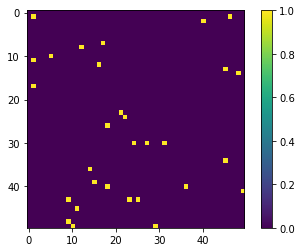

In [4]:
import numpy as np
import matplotlib.pyplot as plt

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    if agent_count > 0 : 
        print(agent_count)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()


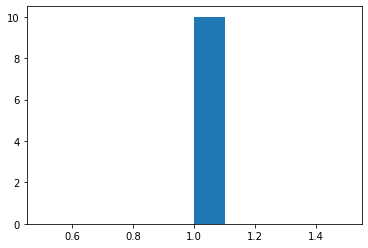

In [27]:
import matplotlib.pyplot as plt

# For jupyter notebook add the following line:
%matplotlib inline

agent_wealth = [a.wealth for a in empty_model.schedule.agents]
plt.hist(agent_wealth)
#For a script add the following line
plt.show()